In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 5000

# Simulate sensor and environmental values within realistic ranges
water_ph = np.round(np.random.uniform(5.5, 8.5, num_samples), 2)  # typical water pH range
soil_moisture = np.round(np.random.uniform(10, 60, num_samples), 2)  # in %
soil_temp = np.round(np.random.uniform(10, 40, num_samples), 2)  # in °C
ambient_temp = np.round(np.random.uniform(10, 45, num_samples), 2)  # in °C
humidity = np.round(np.random.uniform(20, 90, num_samples), 2)  # in %
rain_forecast = np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # 0: No rain, 1: Rain expected

# Generate labels based on some logical rules
def label_condition(w_ph, sm, st, at, hum, rain):
    if (6.0 <= w_ph <= 7.5) and (25 <= sm <= 45) and (15 <= st <= 30) and (20 <= rain <= 80) and (30 <= hum <= 70):
        return "Healthy"
    elif sm < 20 or sm > 50:
        return "Low Moisture" if sm < 20 else "Overwatered"
    elif w_ph < 6.0:
        return "Too Acidic"
    elif w_ph > 7.5:
        return "Too Alkaline"
    elif st > 35 or at > 40:
        return "Too Hot"
    elif hum < 30:
        return "Low Humidity"
    else:
        return "Needs Attention"

# Apply the labeling function
labels = [
    label_condition(w, sm, st, at, h, rf)
    for w, sm, st, at, h, rf in zip(water_ph, soil_moisture, soil_temp, ambient_temp, humidity, rain_forecast)
]

# Create the DataFrame
df = pd.DataFrame({
    "water_ph": water_ph,
    "soil_moisture": soil_moisture,
    "soil_temp": soil_temp,
    "ambient_temp": ambient_temp,
    "humidity": humidity,
    "rain_forecast": rain_forecast,
    "label": labels
})

df.head()


,water_ph,soil_moisture,soil_temp,ambient_temp,humidity,rain_forecast,label
0,6.62,29.68,21.21,27.49,71.10,0,Needs Attention
1,8.35,33.67,19.99,36.14,32.92,0,Too Alkaline
2,7.70,52.73,15.28,29.69,44.26,0,Overwatered
3,7.30,27.00,28.22,12.92,66.43,1,Needs Attention
4,5.97,53.48,24.30,16.50,53.75,0,Overwatered


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Sample size: 1000 data points for 5-day prediction
num_samples = 100000

# Simulate soil and environmental parameters
data = {
    "soil_moisture": np.random.uniform(10, 70, num_samples),  # in percentage
    "soil_temperature": np.random.uniform(10, 35, num_samples),  # in Celsius
    "water_ph": np.random.uniform(5.5, 8.0, num_samples),  # proxy for soil pH
    "ambient_temp_avg": np.random.uniform(20, 40, num_samples),  # 5-day average ambient temp
    "humidity_avg": np.random.uniform(30, 90, num_samples),  # 5-day average humidity
    "rainfall_forecast": np.random.uniform(0, 100, num_samples),  # total rainfall in mm over 5 days
    "sunlight_days": np.random.randint(0, 6, num_samples),  # number of sunny days in next 5
    "crop_type": np.random.choice(["leafy", "root", "fruiting"], num_samples)  # simplified crop categories
}

# Map crop types to numerical values
crop_type_mapping = {"leafy": 0, "root": 1, "fruiting": 2}
data["crop_type"] = [crop_type_mapping[ct] for ct in data["crop_type"]]

# Create a label for soil quality (Good, Moderate, Poor)
# Logic: low moisture, high rainfall, poor pH -> poor quality
labels = []
for i in range(num_samples):
    moisture = data["soil_moisture"][i]
    ph = data["water_ph"][i]
    rain = data["rainfall_forecast"][i]
    temp = data["soil_temperature"][i]
    humidity = data["humidity_avg"][i]

    if (moisture < 20 or ph < 6.0 or ph > 7.5 or rain > 80 or temp > 32 or humidity < 40):
        labels.append("Poor")
    elif (20 <= moisture < 30 or 6.0 <= ph < 6.3 or 7.2 < ph <= 7.5 or 60 < rain <= 80):
        labels.append("Moderate")
    else:
        labels.append("Good")

data["label"] = labels

# Convert to DataFrame
df_soil = pd.DataFrame(data)
df_soil.head()

# Save as CSV
df = pd.DataFrame(data)
df.to_csv("soil_quality_simulated_dataset.csv", index=False)
print("Dataset generated successfully!")


Dataset generated successfully!


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load the dataset
df = pd.read_csv("soil_quality_simulated_dataset.csv")  # Replace with your file path

# 2. Separate features and label
X = df.drop("label", axis=1)
y = df["label"]

# 3. Encode the labels if needed (e.g., Good = 0, Moderate = 1, Poor = 2)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9999

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      2135
    Moderate       1.00      1.00      1.00      3789
        Poor       1.00      1.00      1.00     14076

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Confusion Matrix:
 [[ 2135     0     0]
 [    0  3788     1]
 [    0     1 14075]]


In [4]:
import numpy as np

# Same label_encoder and model must be used as in training
# Load the crop type encoder
crop_type_encoder = LabelEncoder()
crop_type_encoder.fit(["leafy", "root", "fruiting"])  # Make sure this matches your training

# Input from user
soil_moisture = float(input("Enter soil moisture (%): "))
soil_temperature = float(input("Enter soil temperature (°C): "))
water_ph = float(input("Enter water pH: "))
ambient_temp_avg = float(input("Enter 5-day avg ambient temperature (°C): "))
humidity_avg = float(input("Enter 5-day avg humidity (%): "))
rainfall_forecast = float(input("Enter total rainfall forecast for next 5 days (mm): "))
sunlight_days = int(input("Enter number of sunny days in next 5 days (0 to 5): "))
crop_type = input("Enter crop type (leafy/root/fruiting): ")

# Encode crop type
crop_type_encoded = crop_type_encoder.transform([crop_type])[0]

# Create input array
user_input = np.array([[soil_moisture, soil_temperature, water_ph, ambient_temp_avg, humidity_avg,
                        rainfall_forecast, sunlight_days, crop_type_encoded]])

# Predict
prediction = model.predict(user_input)
predicted_quality = label_encoder.inverse_transform(prediction)[0]

print(f"\n🌱 Predicted Soil Quality: {predicted_quality}")


Enter soil moisture (%): 40
Enter soil temperature (°C): 30
Enter water pH: 8.1
Enter 5-day avg ambient temperature (°C): 35
Enter 5-day avg humidity (%): 30
Enter total rainfall forecast for next 5 days (mm): 0
Enter number of sunny days in next 5 days (0 to 5): 5
Enter crop type (leafy/root/fruiting): leafy

🌱 Predicted Soil Quality: Poor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<ipython-input-9-0ecc0043d550>:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


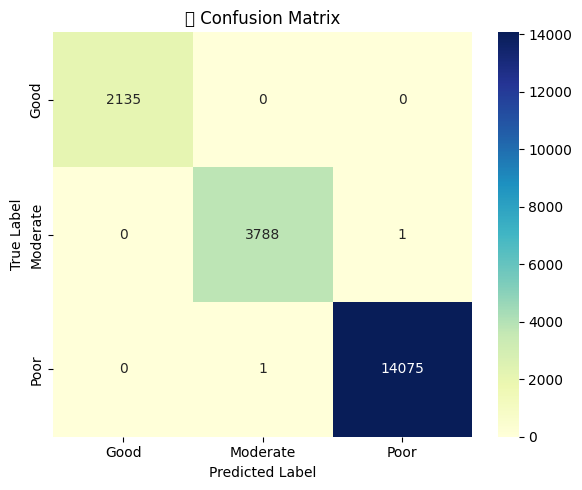

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


<ipython-input-8-eaeb580f3479>:13: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


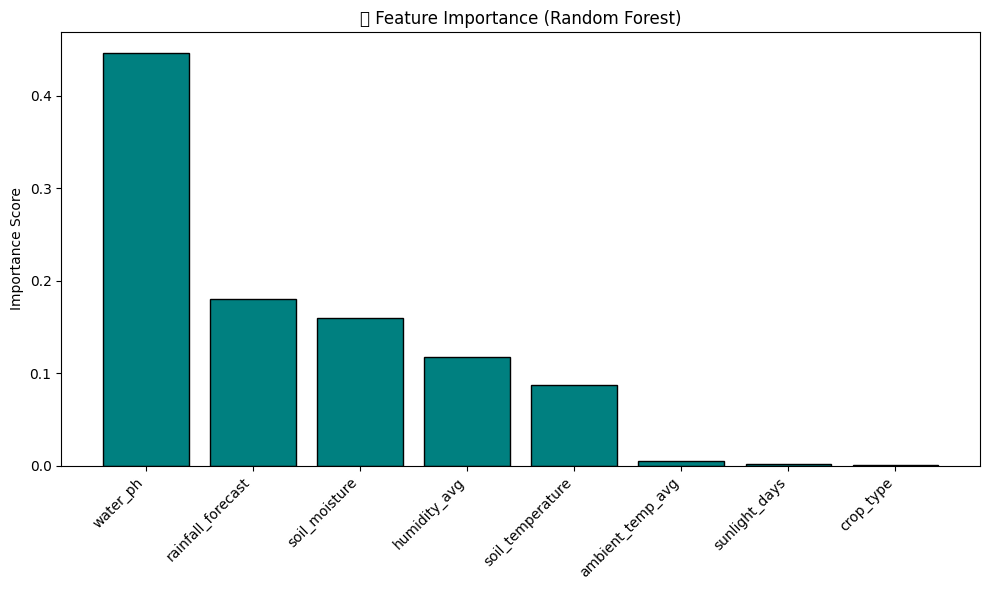

In [8]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], color='teal', edgecolor='black')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha='right')
plt.title("🌿 Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



<ipython-input-10-2b341a0abb2c>:9: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


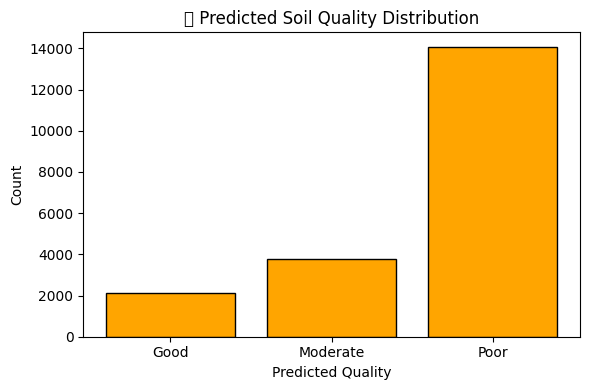

In [10]:
unique, counts = np.unique(y_pred, return_counts=True)
predicted_class_names = label_encoder.inverse_transform(unique)

plt.figure(figsize=(6, 4))
plt.bar(predicted_class_names, counts, color="orange", edgecolor="black")
plt.title("🧾 Predicted Soil Quality Distribution")
plt.xlabel("Predicted Quality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
